# Calorie Prediction

## Problem Statement

#### The aim of the project is to build a linear regression model that utilizes various parameters to estimate the number of calories burnt by an induvidual during an excercise

#### The input parameters for the model include the Duration of an excercise, Average heart rate per minute, Body temperature, Height and Weight of the person.

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection and Pre-Processing 

### Exercise_data

In [2]:
ED = pd.read_csv('exercise.csv')
ED.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3


### Normal heart rate is 60 to 100 beats per minute

In [3]:
ED.shape

(15000, 8)

In [4]:
ED.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

### Calories_data

In [5]:
CD = pd.read_csv('calories.csv')
CD.head(2)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0


In [6]:
CD.shape

(15000, 2)

In [7]:
CD.columns

Index(['User_ID', 'Calories'], dtype='object')

## Joining the Exercise dataset and Calories dataset

In [8]:
Df = pd.merge(left=ED , right=CD , on='User_ID' , how='right')

In [9]:
Df.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0


In [10]:
Df.shape

(15000, 9)

In [11]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [12]:
Df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [13]:
Df.duplicated().sum()

0

## Data Analysis

In [14]:
Df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


#### Note(ex): Percentile means 25% of the values are less then the age 28

## Data Visualization

In [15]:
sns.set()  # Set will give some theme such as grid lines, background in the plots

### How many males and females are there in the dataset

#### Using value_counts

In [16]:
Df['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

#### Using count plot

<Axes: xlabel='Gender', ylabel='count'>

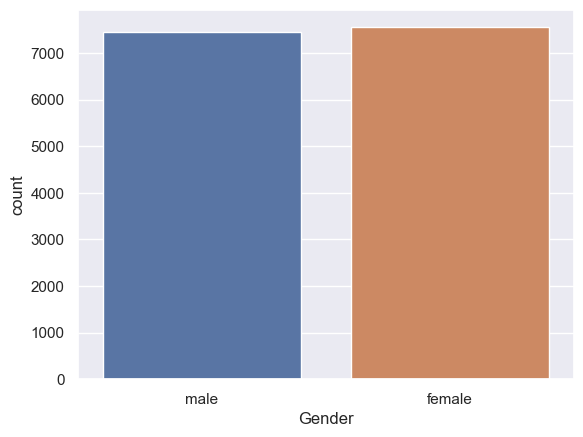

In [17]:
sns.countplot(data=Df , x='Gender')

## Finding the distribution of the 'Age' column

C:\Users\User\AppData\Local\Temp\ipykernel_12124\3420520002.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

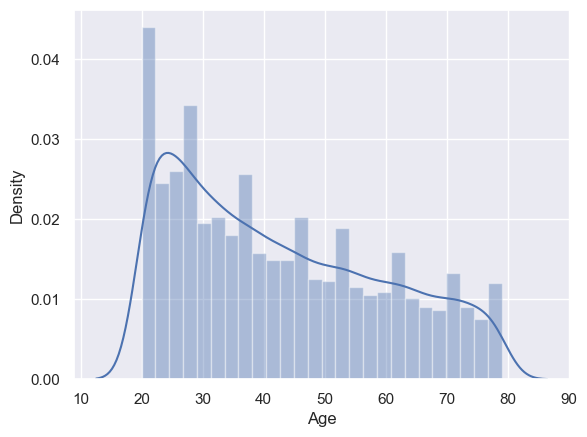

In [18]:
sns.distplot(Df['Age'])

#### Note - More values in the range of 20 - 30 

## Finding the distribution of 'Height' column

C:\Users\User\AppData\Local\Temp\ipykernel_12124\104347115.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

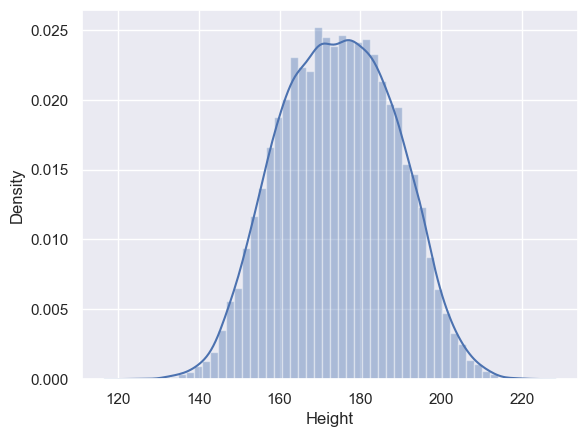

In [19]:
sns.distplot(Df['Height'])

#### Note - We can see a Normal distribution. More peoples height is between 160-180

## Finding the distribution of a 'Weight' column

C:\Users\User\AppData\Local\Temp\ipykernel_12124\1006021667.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

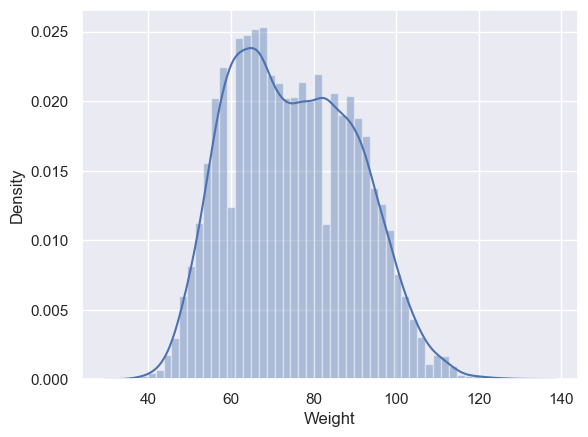

In [20]:
sns.distplot(Df['Weight'])

## Find the distribution of 'Duration' column

C:\Users\User\AppData\Local\Temp\ipykernel_12124\1389163609.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Df['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

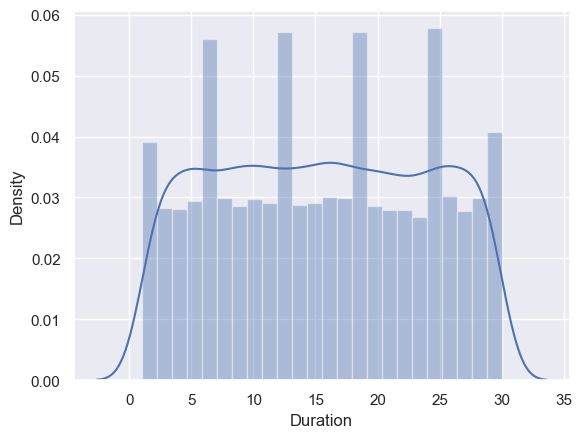

In [21]:
sns.distplot(Df['Duration'])

## Finding the distribution of 'Heart_Rate'

C:\Users\User\AppData\Local\Temp\ipykernel_12124\2787461784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Df['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

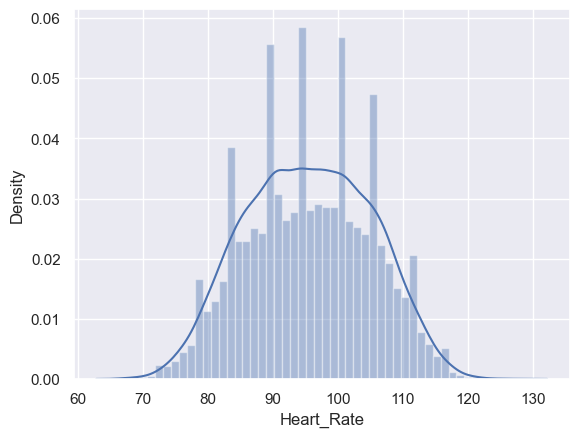

In [22]:
sns.distplot(Df['Heart_Rate'])

#### Note - Normal Distribution

## Finding the distribution of 'Body_Temp' column

C:\Users\User\AppData\Local\Temp\ipykernel_12124\1847661860.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Df['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

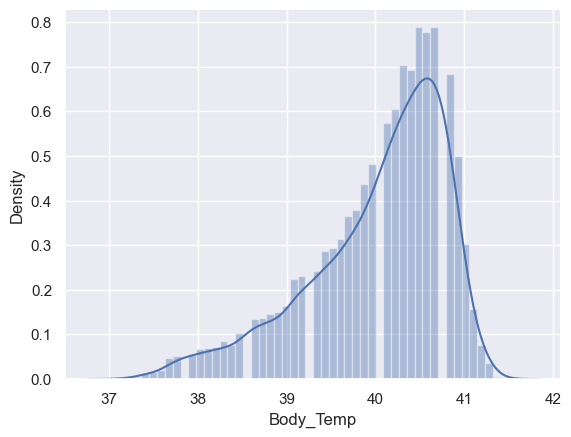

In [23]:
sns.distplot(Df['Body_Temp'])

#### Note - Around 40-41 has the highest

## Correlation

In [24]:
Df.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_12124\4141696000.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Df.corr()


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_12124\428760823.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Df.corr());


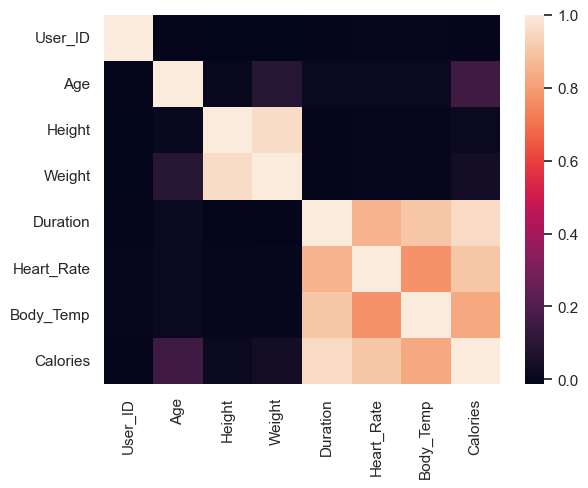

In [25]:
sns.heatmap(Df.corr());

C:\Users\User\AppData\Local\Temp\ipykernel_12124\1291660391.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Df.corr() , square = True , fmt = '.1f' , annot = True , annot_kws={'size':8} , cmap='Blues')


<Axes: >

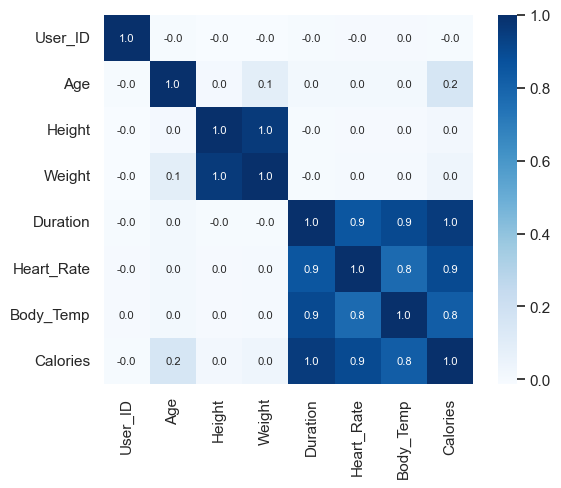

In [26]:
sns.heatmap(Df.corr() , square = True , fmt = '.1f' , annot = True , annot_kws={'size':8} , cmap='Blues')

#### 0 -> No correlation , 1 -> Positively Correlated , -1 -> Negatively Correlated

## One hot encoding

In [27]:
DF = pd.get_dummies(Df , columns=['Gender'])
DF.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,0,1
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,1,0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,0,1
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,1,0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,1,0


## Separating Features and Target

In [28]:
X = DF.drop(columns=['User_ID','Calories'])

In [29]:
y = DF['Calories']

In [30]:
X.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,0,1
1,20,166.0,60.0,14.0,94.0,40.3,1,0
2,69,179.0,79.0,5.0,88.0,38.7,0,1
3,34,179.0,71.0,13.0,100.0,40.5,1,0
4,27,154.0,58.0,10.0,81.0,39.8,1,0


In [31]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

## Splitting the dataset into Train and Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 2)

In [34]:
print(X.shape , X_train.shape , X_test.shape)

(15000, 8) (12000, 8) (3000, 8)


## Model Training

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [36]:
model.fit(X_train , y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

In [38]:
y_pred

array([137.49241057, 182.18166512,  50.15864741, ..., 157.56637167,
        16.54924422, 100.21047087])

## Metrics

In [39]:
from sklearn.metrics import mean_squared_error , r2_score

In [40]:
mse = mean_squared_error(y_test , y_pred)

In [41]:
r2 = r2_score(y_test , y_pred)

In [42]:
print("Mean Squared Error (MSE):",mse)
print("R-Squared (R2) Score:",r2)

Mean Squared Error (MSE): 130.08707386188377
R-Squared (R2) Score: 0.9668790377181355


## Building a prediction system

In [43]:
Input_Data = DF.drop(columns=['Calories','User_ID']).sample(1)

In [44]:
Input_Data

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_female,Gender_male
13709,32,173.0,78.0,8.0,94.0,39.6,0,1


In [45]:
Input_Data_asarray = np.asarray(Input_Data)
Input_Data_asarray

array([[ 32. , 173. ,  78. ,   8. ,  94. ,  39.6,   0. ,   1. ]])

In [46]:
Input_data_reshaped = Input_Data_asarray.reshape(1,-1)
Input_data_reshaped

array([[ 32. , 173. ,  78. ,   8. ,  94. ,  39.6,   0. ,   1. ]])

In [47]:
model.predict(Input_data_reshaped)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([38.97080254])

## Manual Sample (User_ID -> 177771927)

In [48]:
ID = (27,154.0,58.0,10.0,81.0,39.8,1,0)

### Changing tuple to array

In [49]:
ID_asarray = np.asarray(ID)
ID_asarray

array([ 27. , 154. ,  58. ,  10. ,  81. ,  39.8,   1. ,   0. ])

### Reshape the array

In [50]:
ID_reshape = ID_asarray.reshape(1,-1)
ID_reshape

array([[ 27. , 154. ,  58. ,  10. ,  81. ,  39.8,   1. ,   0. ]])

### Prediction

In [51]:
model.predict(ID_reshape)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.35602762])